## Gradient descent 

In [1]:
# the required imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### a few functions that we need

In [2]:
# define a least squares function f: R^2 -> R
def myFunction(x):
    A = np.array([[2, 1], [1, 1]])
    b = np.array([1, 1])
    value = 0.5* np.dot(x, (A.dot(x))) - np.dot(x, b)
    
    return A, b, value

In [3]:
# create surface values
def createSurface(function, arange, steps):
    xGrid = np.linspace(arange[0], arange[1], steps)
    yGrid = np.linspace(arange[0], arange[1], steps)
    xx, yy = np.meshgrid(xGrid, yGrid)
    grid = np.array([xx.flatten(), yy.flatten()])
    
    surface = []
    for i in range(grid.shape[1]):
        A, b, value = function(grid[:, i])
        surface.append(value)
        
    surface = (np.asarray(surface)).reshape(steps, steps)
    return xx, yy, surface

In [4]:
# create a 3d plot for the function
def plotFunction3d(function, arange, steps, axes):
    xx, yy, surface = createSurface(function, arange, steps)
    axes.plot_surface(xx, yy, surface, cmap=cm.coolwarm)

In [5]:
# create a contour plot
def plotFunctionContour(function, arange, steps, axes):
    xx, yy, surface = createSurface(function, arange, steps)
    axes.contour(xx, yy, surface)
    axes.set_xlim(arange[0], arange[1]); axes.set_ylim(arange[0], arange[1])

### let's have a look at our function

<IPython.core.display.Javascript object>


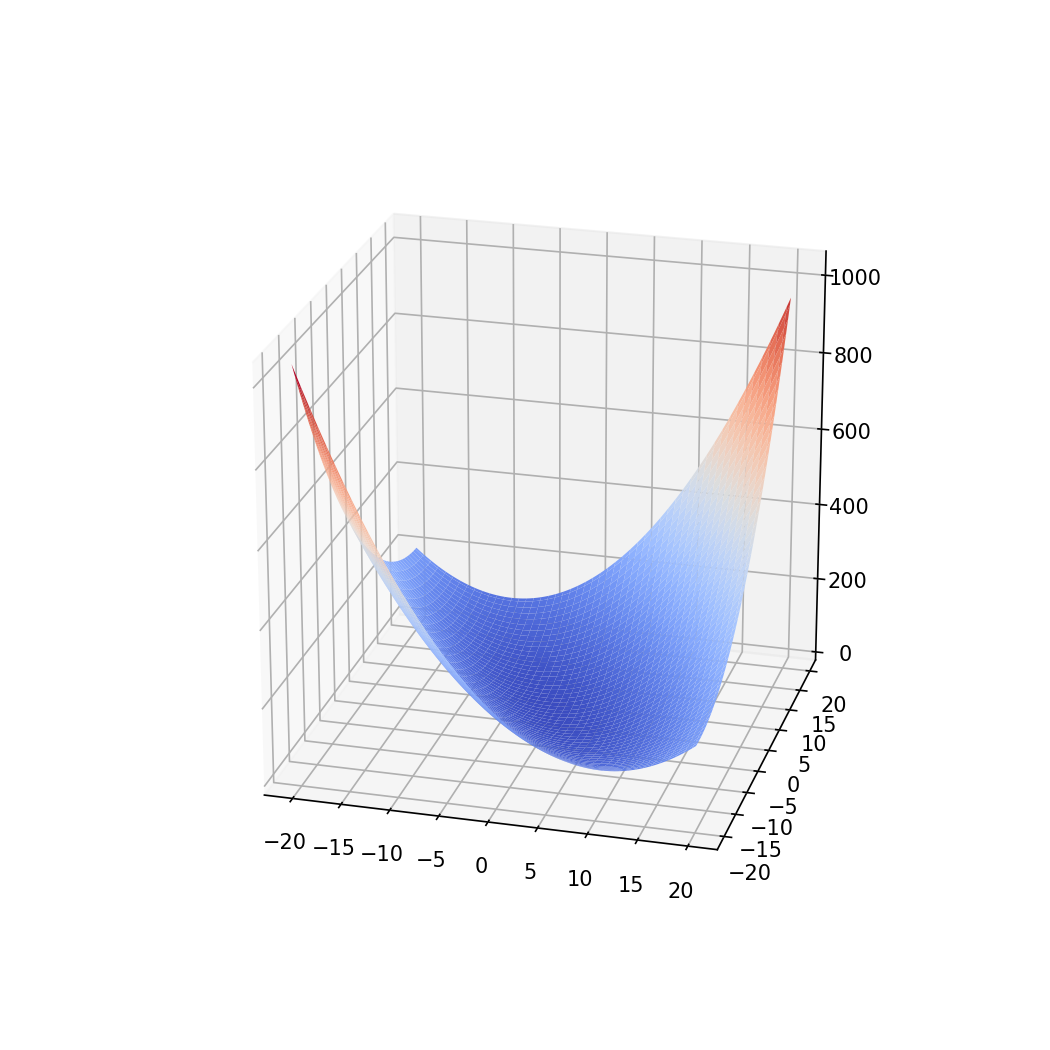

In [6]:
%matplotlib notebook

plt.figure(figsize=(7,7))
plotFunction3d(myFunction, [-20, 20], 100, plt.gca(projection='3d'))
plt.show()

<IPython.core.display.Javascript object>


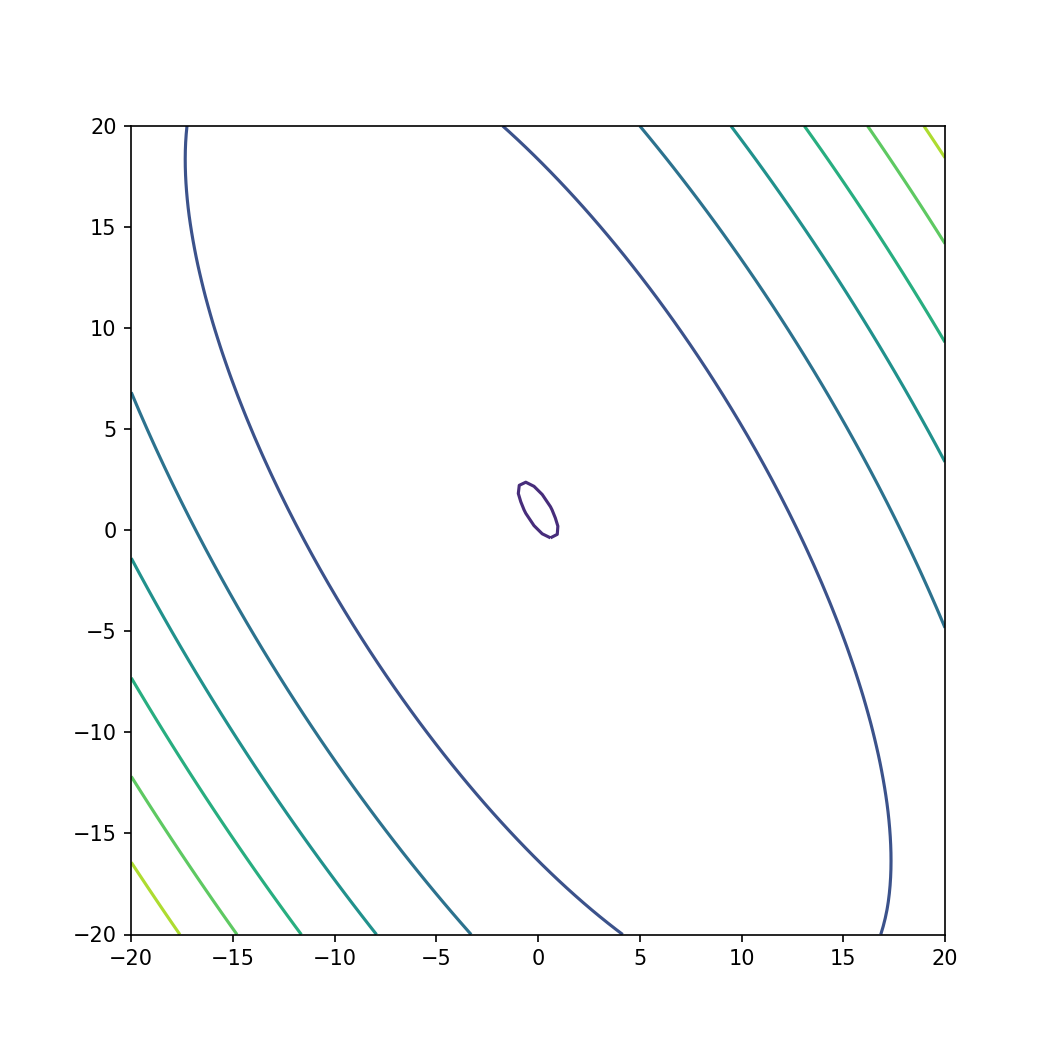

In [7]:
plt.figure(figsize=(7,7))
plotFunctionContour(myFunction, [-20, 20], 100, plt.gca())
plt.show()

### let's look at what gradient descent does

In [8]:
# the gradient descent method
def gradientDescent(function, x0, iterations):
    x = x0
    history = np.zeros((2, iterations+1))
    history[:, 0] = x0
    
    A, b, value0 = function(x0)
    values = np.zeros(iterations+1)
    values[0] = value0
    
    for i in range(iterations):
        d = b - A.dot(x)
        alpha = (d.T).dot(d) / (d.T).dot(A).dot(d)
        x = x + alpha*d
        history[:,i+1] = x
        _, _, values[i] = function(x)
        
    return history, values

### plot it

<IPython.core.display.Javascript object>


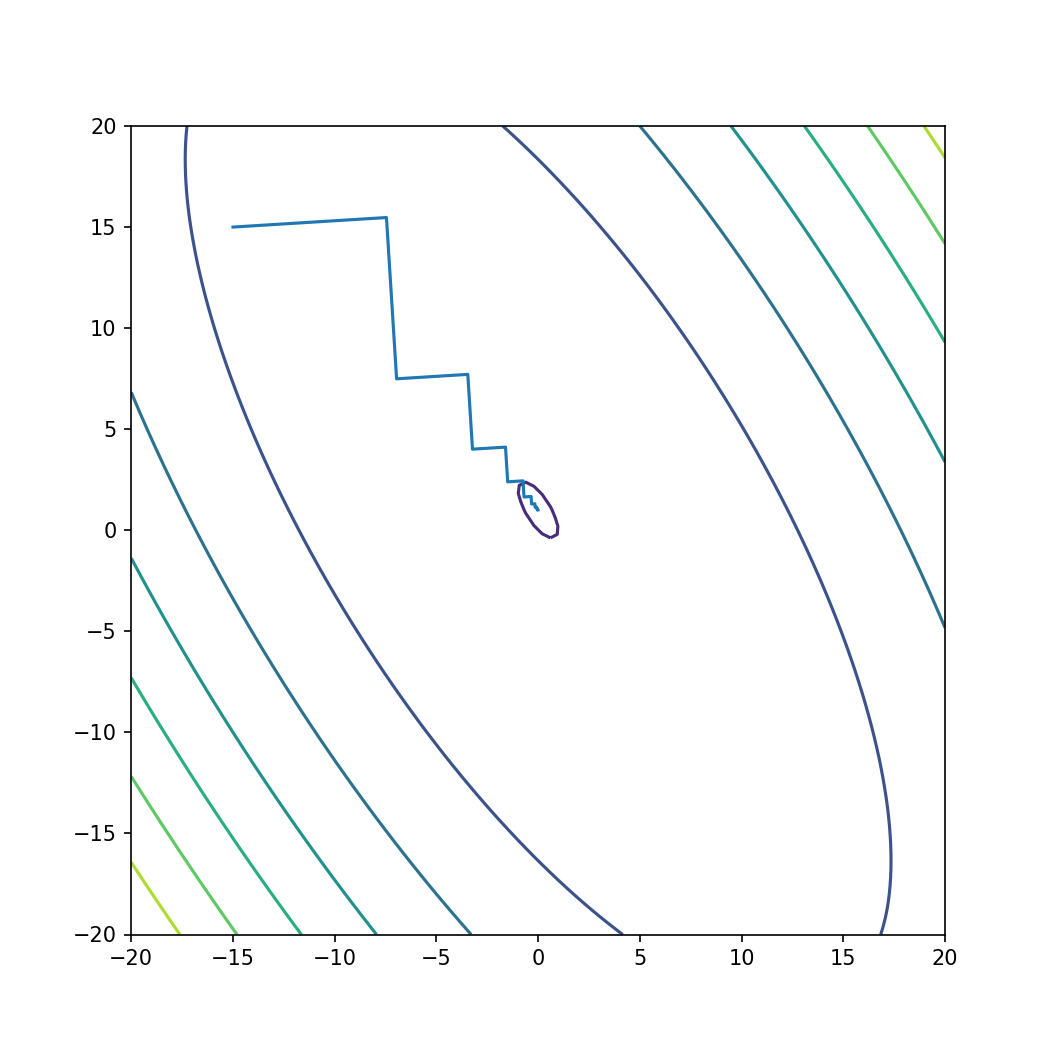

In [9]:
points, _ = gradientDescent(myFunction, [-15, 15], 20)

plt.figure(figsize=(7,7))
axes = plt.gca()
plotFunctionContour(myFunction, [-20, 20], 100, axes)
axes.plot(points[0,:], points[1,:])
plt.show()

<IPython.core.display.Javascript object>


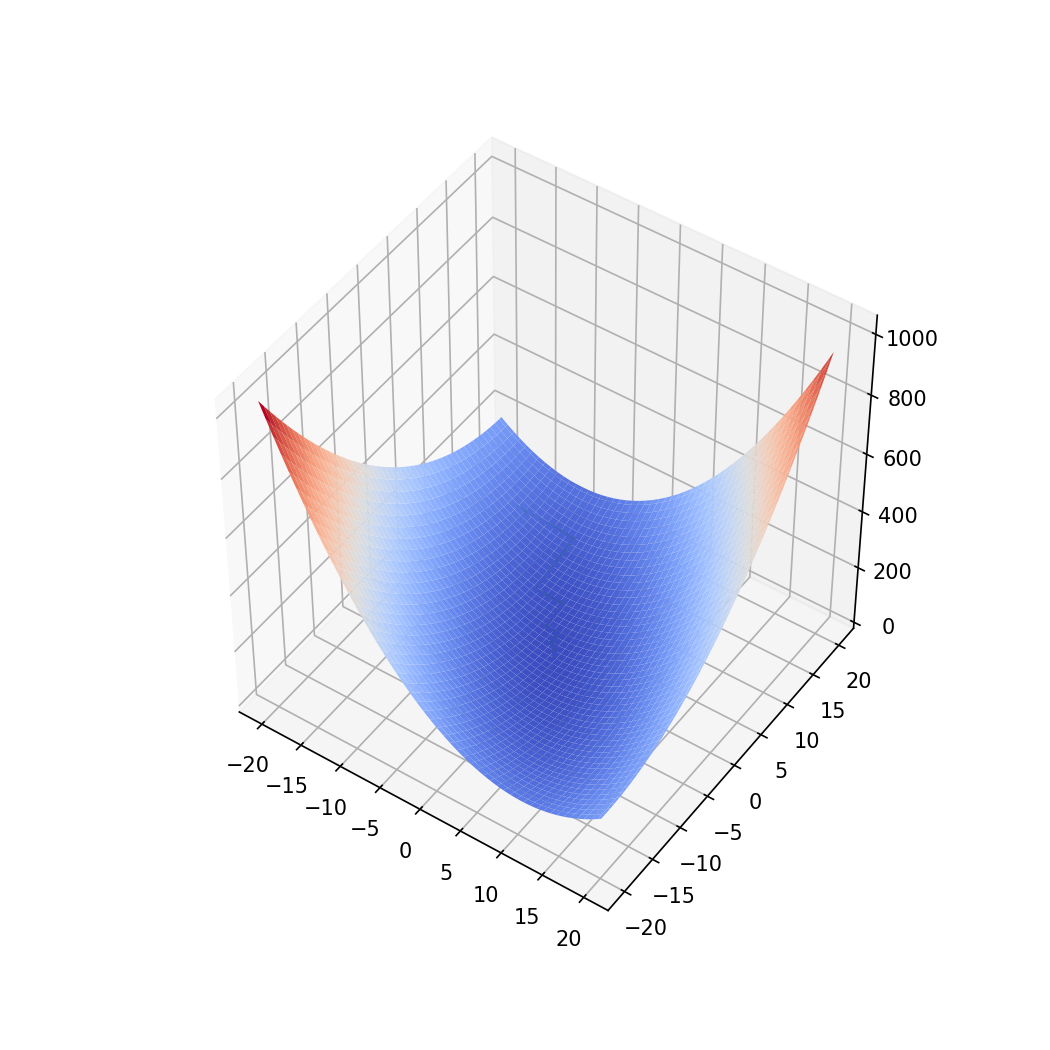

In [10]:
points, values = gradientDescent(myFunction, [-15, 15], 20)

plt.figure(figsize=(7,7))
axes = plt.gca(projection='3d')
plotFunction3d(myFunction, [-20, 20], 100, axes)
axes.plot(points[0,:], points[1,:], values, color='g')
plt.show()